### Ejercicio 2.B

Seguimos con la red neuronal que predice si una radiografía es de tórax.

Si para 10 imágenes ha sacado los siguientes resultados:
y_score=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34,0.4, 0.66, 0.88, 0.94,0.47,0.2])

Pero los valores verdaderos son los siguientes:
y_true=np.array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0])

Indica el n.º de:
- Verdaderos Positivos (TP)
- Verdaderos Negativos (TN)
- Falsos Positivos (FP)
- Falsos Negativos (FN)

Dibuja la matriz de confusión

y_score =   [0.27,  0.45,   0.76,   0.55,   0.28,   0.04,   0.34,   0.4,    0.66,   0.88,   0.94,   0.47,   0.2]
y_true  =   [1,     0,      1,      0,      0,      0,      1,      0,      1,      1,      1,      1,      0]

TP = 4
TN = 5
FP = 1
FN = 3 

    PP  PN
P   4   3
N   1   5

P(E) = Prevalence = 7/13
P(P|E) = TP / E = 4 / 7
P(N|S) = TN / S = 5 / 6
P(E|P) = TP / PP = 4 / 5
P(S|N) = TN / PN  = 5 / 8

Bayes:

$Precisión=VPP=\frac{Sensibilidad*Prevalencia}{Sensibilidad*Prevalencia+(1-Especificidad)*(1-Prevalencia)}$

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator


def get_precision(sensibility, specificity, prevalence):
    return (sensibility * prevalence) / (sensibility * prevalence + (1 - specificity) * (1 - prevalence))

In [20]:
def get_vpn(sensibility, specificity, prevalence):
    return (specificity * (1 - prevalence)) / (specificity * (1 - prevalence) + (1 - sensibility) * prevalence)

In [21]:
def get_metrics(tp, tn, fp, fn):
    prevalence = (tp + fn) / (tp + tn + fp + fn)
    sensibility = tp / (tp + fn)
    specificity = tn / (fp + tn)

    return prevalence, sensibility, specificity

In [22]:
# sensibility = 4 / 7
# specificity = 5 / 6
# prevalence = 7 / 13

prevalence, sensibility, specificity = get_metrics(4, 5, 1, 3)
precision = get_precision(sensibility, specificity, prevalence)
vpn = get_vpn(sensibility, specificity, prevalence)

In [23]:
print(f"Prevalence: {prevalence}")
print(f"Sensibility: {sensibility}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"VPN: {vpn}")

Prevalence: 0.5384615384615384
Sensibility: 0.5714285714285714
Specificity: 0.8333333333333334
Precision: 0.7999999999999999
VPN: 0.625


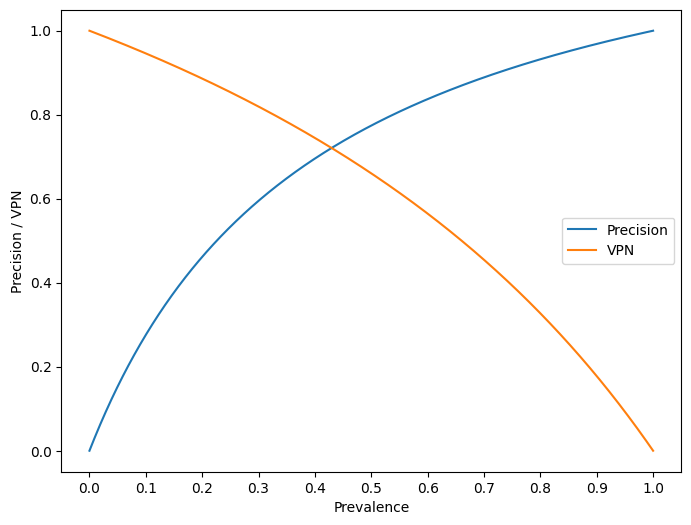

In [35]:
prevalence_sample = np.linspace(0, 1, 1_000)
precision_sample = get_precision(sensibility, specificity, prevalence_sample)
vpn_sample = get_vpn(sensibility, specificity, prevalence_sample)

figure = plt.figure(figsize=(8, 6))
axe = figure.add_subplot(1, 1, 1)
axe.plot(prevalence_sample, precision_sample, label="Precision")
axe.plot(prevalence_sample, vpn_sample, label="VPN")
axe.set_xlabel("Prevalence")
axe.xaxis.set_major_locator(MultipleLocator(0.1))
axe.set_ylabel("Precision / VPN")
axe.legend()